<img src='https://upload.wikimedia.org/wikipedia/fr/thumb/e/ed/Logo_Universit%C3%A9_du_Maine.svg/1280px-Logo_Universit%C3%A9_du_Maine.svg.png' width="300" height="500">
<br>
<div style="border: solid 3px #000;">
    <h1 style="text-align: center; color:#000; font-family:Georgia; font-size:26px;">Mathématiques pour l'IA</h1>
    <p style='text-align: center;'>Master Informatique 1</p>
    <p style='text-align: center;'>Marie Tahon</p>
</div>



## TP1 Maths pour l'IA: Calcul de normes et de distances

Ce TP vous permettra de mettre en pratique le cours de Maths sur les normes et les distances calculées sur des vecteurs (ou des matrices) de grande dimension. Dans un première temps vous implémenterez les différents calculs de distance vus en cours et vous les validerez sur des exemples simples. Dans un deuxième temps, vous cherchez à identifier des locuteurs à partir d'une similarité obtenue sur des vecteurs de grande dimension.

## Partie 1: Implémentation des normes et distances

### 1.1. Normes $L^1$ et $L^2$, $L^{\infty}$

In [1]:
import numpy as np

x = np.array([2, 3, -1])
y = np.array([2, 3, 10])

Créer trois fonctions qui permettent de calculer les normes L$^1$, L$^2 $et L$^\infty$ d'un vecteur de dimension $n$. Calculer ces normes pour les vecteurs $x$ et $y$. Ce sont les vecteurs vus en cours, vous connaissez donc le résultat, sinon refaites le calcul pour vérifier.

In [2]:
def L1norm(x):
    return np.sum(np.abs(x))

def L2norm(x):
    return np.sqrt(np.sum(np.power(x,2)))

def Linf(x):
    return np.max(np.abs(x))

print(f"L1: {L1norm(x)}, L2: {L2norm(x)}, Linf : {Linf(x)}")
print(f"L1: {L1norm(y)}, L2: {L2norm(y)}, Linf : {Linf(y)}")

L1: 6, L2: 3.7416573867739413, Linf : 3
L1: 15, L2: 10.63014581273465, Linf : 10


### 1.2. Norme de Froebenius
Créer une fonction permettant de calculer la norme de Froebenius d'une matrice $\mathbf{A}$.

In [3]:
A = np.array([[  2,  -5, -11,   0],
       [-10,   4,   6,  13],
       [  4,   7,  12,  -2]])

In [4]:
def Fnorm(A):
    return np.sqrt(np.sum(np.power(A, 2)))

print(Fnorm(A))

26.153393661244042


### 1.3. Comportement proche de 0

Q1. Est-ce que l'égalité suivante ```0.1 + 0.1 +0.1 == 0.3``` est vraie en Python ?

In [5]:
print(0.1 + 0.1 + 0.1 == 0.3)

False


Q2. La fraction décimale ```0.125``` peut s'écrire sous la forme $0\cdot 10^0 + 1\cdot 10^{-1} + 2\cdot 10^{-2} +5\cdot 10^{-3}$. Donner la forme des fractions binaires ```0.1``` et ```0.3``` ?
 
$0.1 = 0\cdot 10^0 + 1\cdot 10^{-1}$
 
$0.3 = 0\cdot 10^0 + 3\cdot 10^{-1}$

Q3. En utilisant le format d'affichage des flottants en Python, par exemple ```"%.2f" %0.1``` donner la valeur exacte en décimale de l'approximation en binaire stockées en machine pour ```0.1```.

In [6]:
print("%.20f" %0.1)

0.10000000000000000555


Q3. Expliquer le résultat obtenu à la première question.

Q4. Définir des vecteurs contenant des très petites valeurs (de l'ordre de $10^{-320}$). Vérifier que ces valeurs sont bien différentes de 0. Vérifier que les normes L1 et L2 de ces vecteurs sont bien différentes de 0. 

Qu'en concluez-vous sur le choix des normes L1 ou L2 ?

In [7]:
vec1 = np.array([1e-320, 25.365e-320, 0.258e-311, 1.111e-333])
print(vec1)
print(L1norm(vec1) != 0)
print(L2norm(vec1) != 0)

[9.9999e-321 2.5365e-319 2.5800e-312 0.0000e+000]
True
False


### 1.5. Calcul des distances

Q5. Définir plusieurs fonctions correspondantes aux distances vues en cours: Manhattan, Euclidienne, Tchebychev. Vous proposerez également une implémentation de la similarité cosinus. Vous vérifierez que les dimensions des deux vecteurs $x$ et $y$ sont égales.

In [8]:
def manhattan(x, y):
    return L1norm(x-y)

def euclidienne(x, y):
    return L2norm(x-y)

def tchebychev(x, y):
    return Linf(x-y)

def sim_cos(u,v):
    return u.dot(v) / ( L2norm(u) * L2norm(v) )

Q6. Le calcul de la similarité cosinus fait intervenir le produit scalaire. Nous avons vu en cours qu'il existait deux approches pour le calculer. En utilisant la librairie ```time``` évaluer le temps pris par chacune de ces approches quand les vecteurs sont de grande dimension et choisissez celle qui vous semble la plus pertinente.

In [9]:
import time
n = 800 # dimension du vecteur
a = np.linspace(0,1,n)
b = np.random.randn(n)
start = time.time()
for _ in range(1_000_000):
    prod_scalaire1 = a.dot(b)
end = time.time()
t1 = end-start
print(f"temps méthode 1 : {t1:.3f}s")
print(prod_scalaire1)
start = time.time()
for _ in range(1_000_000):
    prod_scalaire2 = np.sum(a*b)
end = time.time()
t2 = end-start
print(f"temps méthode 2 : {t2:.3f}s")
print(prod_scalaire2)
print(f"ratio : {t2/t1:.2f}x faster")

temps méthode 1 : 2.299s
-30.248715366900537
temps méthode 2 : 10.402s
-30.248715366900534
ratio : 4.53x faster


Q7. Calculer la distance entre les vecteurs $x$ et $y$ définis au tout début avec les différentes versions que vous aurez implémentées.

In [10]:
print(f"Manhattan : {manhattan(x,y)}")
print(f"Euclidienne : {euclidienne(x,y)}")
print(f"Tchebychev : {tchebychev(x,y)}")
print(f"Similarité cosinus : {sim_cos(x,y)}")

Manhattan : 11
Euclidienne : 11.0
Tchebychev : 11
Similarité cosinus : 0.07542546827314035


---------------------------------------

## Partie 2: Matrices de similarité sur le dataset Iris
Pour cette première partie on utilisera le dataset Iris que l'on peut récupérer directement dans la librairie ```sklearn```. Le corpus est organisé en dictionnaire, où la clé *data* correspond aux caractéristiques et la clé *target* aux labels.

Q1. Charger le corpus, et vérifier que vous avez bien 150 iris de 3 types différents et 4 caractéristiques (vous afficherez les dimensions des tableaux que vous récupérerez). La fonction vous permettant de récupérer les valeurs uniques en python est ```set```. Afficher les caractéristiques et labels correspondant aux 3 premières données.

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris() # La variable iris est un dictionnaire
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Q2. Afficher l'ensemble des données suivant leurs caractéristiques suivant deux axes que vous choisirez parmi les 4 caractéristiques. 

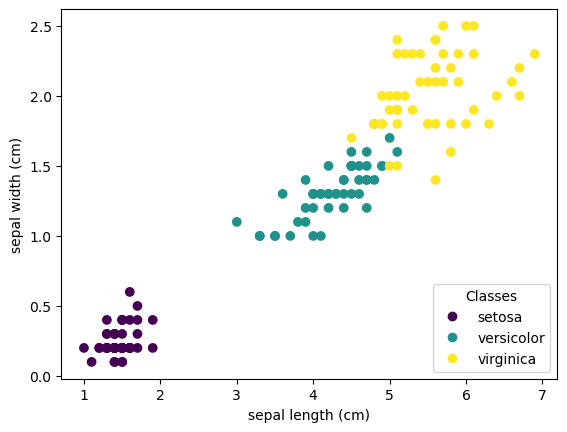

In [12]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Q3. On va maintenant chercher à calculer une matrice de similarité sur l'ensemble des données du dataset iris. Calculer la distance entre chacune des données deux à deux. Vous retournerez une matrice de similarité que vous afficherez (fonction ```imshow()```). Tester plusieurs mesures de distance et observez les modifications sur la matrice de similarité.

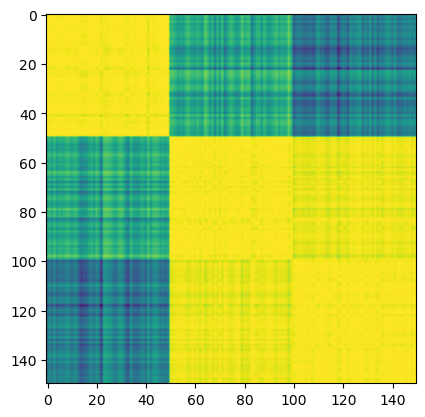

In [13]:
from typing import Callable

# Here is what I previously attempted to do. 
# This wasn't ideal because of the nested for loop that take quite some time to run.
def similarite_slow(arr1: np.ndarray, arr2: np.ndarray, func: Callable[[np.ndarray, np.ndarray], float]) -> np.ndarray:
    # Apply the given custom function using two nested for loops.
    return np.array( [[func(arr1[i], arr2[j]) for i in range(len(arr1))] for j in range(len(arr2))] )

# Also, cheating a little bit by using the linalg module, we can do this much faster for the L2 norm for example:
def similarite_linalg(arr1: np.ndarray, arr2: np.ndarray) -> np.ndarray:
    return np.linalg.norm(arr1[:, np.newaxis] - arr2, axis=-1)

# Here is the proper way to implement it (without loops, and without using linalg)
def similarite(arr1: np.ndarray, arr2: np.ndarray, func: Callable[[np.ndarray, np.ndarray], float]) -> np.ndarray:
    """
    Given to arrays that both represent a list of vectors and a custom function, it returns a 2D array representing a similarity matrix
    
    :param arr1: The first array of shape (N, M). Let M be the length of each vector, there are N vectors in this array
    :param arr2: The second array of shape (P, M). Let M be the length of each vector, there are P vectors in this array
    :param func: a custom function that takes two vectors (1D array) of the same size as an argument and return their distance/similarity as a float.
    :return: The similarity matrix between arr1 and arr2 as a 2D np.ndarray
    """
    # Use np.vectorize to apply the given custom function row by row
    vectorized_function = np.vectorize(
        func, 
        signature='(n),(n)->()'  # tells NumPy that the function takes two 1D arrays (rows of length n) and returns a scalar value (()).
    )
    
    # Apply the function to the rows of the two arrays
    output_array = vectorized_function(
        arr1[:, np.newaxis, :],  # reshapes the array to have an extra axis, making it of shape (N, 1, M). This allows broadcasting to work with the second array of shape (P, M).
        arr2
    )
    
    # Return the transposition of the output array to present it in the expected shape
    return output_array.T
    
S = similarite(iris.data, iris.data, sim_cos)

plt.imshow(S)
plt.show()

## Partie 3. Identifier un locuteur à partir d'une similarité
La tâche d'identification du locuteur consiste à apprendre des modèles de locuteurs connus suivant leur identifiant, et ensuite associer l'enregistrement d'un locuteur inconnu avec un des identifiants.
Pour cela, les techniques récentes utilisent des représentations de locuteurs apprises sur de grandes quantités de données appelées *speaker embeddings*. Ces représentations sont des vecteurs de grande dimension qui capturent l'identité vocale des locuteurs.

Les locuteurs apparaissent plusieurs fois dans le corpus, on a plusieurs extraits audio (segments de parole) où un même locuteur apparait.

A partir d'un signal de parole correspondant à un locuteur connu, on extrait un vecteur d'*embeddings*. Ces locuteurs feront partie de l'enrollement. On obtient alors une modélisation acoustique pour chaque locuteur de notre partition d'enrollement.

En phase de test, on récupère un extrait de signal de parole correspondant à un unique locuteur que l'on ne connait pas. On extrait à partir de ce signal le vecteur d'*embeddings* associé et on va chercher l'identifiant correspondant au vecteur d'*embeddings* du locuteur de l'enrollement le plus similaire. On calculera un taux d'erreur suivant la distance utilisée à partir des identifiants des locuteurs inconnus présent dans la partition de test.

In [14]:
enroll_ids = np.load("enroll_ids.npy")#identifiants des locuteurs connus
enroll_xv = np.load("enroll_xv.npy")  #vecteurs d'embeddings des loc connus

test_ids = np.load("test_ids.npy")    #identifiants des locuteurs inconnus => pour vérifier
test_xv = np.load("test_xv.npy")      #vecteurs d'embeddings des loc inconnus

print(enroll_ids.shape)
print(enroll_xv.shape)
print()
print(test_ids.shape)
print(test_xv.shape)

(1111,)
(1111, 256)

(6422,)
(6422, 256)


### 3.1. Calculer les scores avec une similarité cosine

Q1. Calculer la similarité entre chaque locuteur connu de la partition d'enrollement et chaque locuteur inconnu de la partition de test.

Séparer les cas où les identifiants des locuteurs connus et inconnus sont les mêmes ou différents. 

Stocker les scores dans deux variables différentes et vérifier que la moyenne des scores entre deux locuteurs différents est plus petite (moins similaire) que celle obtenue entre deux locuteurs identiques (très similaire).

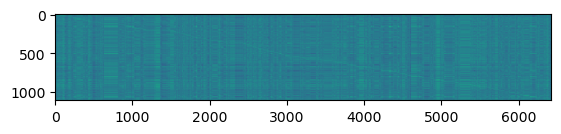

In [15]:
S = similarite(enroll_xv, test_xv, sim_cos)

plt.imshow(S.T)
plt.show()

In [16]:
connus, inconnus = [], []
for i in range(len(enroll_ids)):
    for j in range(len(test_ids)):
        if enroll_ids[i] == test_ids[j]:
            connus.append(S[j,i])
        else:
            inconnus.append(S[j,i])

In [19]:
connus2=np.array([])
for i in range(len(enroll_ids)):
    for j in range(len(test_ids)):
        if enroll_ids[i] == test_ids[j]:
            np.append(connus2, S[j,i])
            break

In [17]:
print(f"({np.sum(connus)},{len(connus)})")
print(f"({np.sum(inconnus)},{len(inconnus)})")
print()
print(np.sum(connus)/len(connus))
print(np.sum(inconnus)/len(inconnus))

(5142.37841796875,6422)
(1541368.75,7128420)

0.8007440700667627
0.21622866638048824


### 3.2. Calculer un taux d'erreur

Q2. Pour un locuteur inconnu de la partition de test, on cherchera l'identifiant du locuteur de la partition d'enrollement qui a le plus grand score de similarité. On considère alors que cet identifiant correspond au locuteur prédit. 

En comparant l'identifiant du locuteur prédit avec celui du locuteur de référence, on peut évaluer les performances de notre approche en calculant un taux d'erreur (nombre de bonnes réponses / nombre de locuteurs inconnus).

In [49]:
agmaxi = np.argmax(S, axis=1)
score = 0
for i in range(len(agmaxi)):
    if enroll_ids[agmaxi[i]] == test_ids[i]:
        score += 1
print(score)

# Here is a one-liner alternative that don't use loops, only numpy ! (so it's better ^^)
print(np.sum(enroll_ids[np.argmax(S, axis=1)]==test_ids)/len(test_ids))

5891
0.917315478044223
(1111,)
(6422,)
(6422,)
[ True  True  True ...  True  True  True]
(5891,)
5891
0.917315478044223


Q3. Le modèle qui a permis d'apprendre les *embeddings* a été entraîné avec une similarité cosinus. Est-ce que cette mesure de similarité est bien celle qui donne le meilleur taux de reconnaissance ?